# PERBANDINGAN METODE TRIPLE EXPONENTIAL SMOOTHING DAN AUTOREGRESSIVE INTEGRATED MOVING AVERAGE (ARIMA) PADA PERAMALAN HARGA CRYPTOCURRENCY (STUDI KASUS: LIMA KOIN KRIPTO TERATAS)

1. Set-Up
2. EDA
3. Data Preprocessing
4. Tuning
5. Modelling
6. Evaluation


# Set-Up

## Import Library

In [113]:
# data manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

# z-core
from scipy import stats
# train test split
from pmdarima.model_selection import train_test_split

# metrics evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, classification_report,confusion_matrix, accuracy_score, mean_absolute_error, r2_score

# model
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

## Import Data

In [114]:
# data_btc = pd.read_csv("/home/user/forecast-tse-arima/dataset/BTC-USD.csv")
# data_eth = pd.read_csv("/home/user/forecast-tse-arima/dataset/ETH-USD.csv")
# data_bnb = pd.read_csv("/home/user/forecast-tse-arima/dataset/BNB-USD.csv")
# data_sol = pd.read_csv("/home/user/forecast-tse-arima/dataset/SOL-USD.csv")
# data_xrp = pd.read_csv("/home/user/forecast-tse-arima/dataset/XRP-USD.csv")
data_btc = pd.read_csv("dataset/BTC-USD.csv")
data_eth = pd.read_csv("dataset/ETH-USD.csv")
data_bnb = pd.read_csv("dataset/BNB-USD.csv")
data_sol = pd.read_csv("dataset/SOL-USD.csv")
data_xrp = pd.read_csv("dataset/XRP-USD.csv")

# EDA

In [115]:
# Read Data
data_btc

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,40730301359
1,2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,67865420765
2,2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,78665235202
3,2021-01-04,32810.949219,33440.218750,28722.755859,31971.914063,31971.914063,81163475344
4,2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688,33992.429688,67547324782
...,...,...,...,...,...,...,...
1090,2023-12-27,42518.468750,43683.160156,42167.582031,43442.855469,43442.855469,25260941032
1091,2023-12-28,43468.199219,43804.781250,42318.550781,42627.855469,42627.855469,22992093014
1092,2023-12-29,42614.644531,43124.324219,41424.062500,42099.402344,42099.402344,26000021055
1093,2023-12-30,42091.753906,42584.125000,41556.226563,42156.902344,42156.902344,16013925945


In [116]:
data_btc.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1095.0,3.482320e+04,1.256097e+04,1.578230e+04,2.470548e+04,3.213887e+04,4.353272e+04,6.754973e+04
High,1095.0,3.561568e+04,1.292156e+04,1.625305e+04,2.521547e+04,3.332710e+04,4.418802e+04,6.878962e+04
Low,1095.0,3.395326e+04,1.213239e+04,1.559905e+04,2.427638e+04,3.103027e+04,4.256395e+04,6.638206e+04
Close,1095.0,3.483138e+04,1.255608e+04,1.578728e+04,2.469368e+04,3.218628e+04,4.355131e+04,6.756683e+04
Adj Close,1095.0,3.483138e+04,1.255608e+04,1.578728e+04,2.469368e+04,3.218628e+04,4.355131e+04,6.756683e+04
Volume,1095.0,3.180665e+10,2.053404e+10,5.331173e+09,1.863833e+10,2.783388e+10,3.851887e+10,3.509679e+11


In [117]:
data_btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1095 non-null   object 
 1   Open       1095 non-null   float64
 2   High       1095 non-null   float64
 3   Low        1095 non-null   float64
 4   Close      1095 non-null   float64
 5   Adj Close  1095 non-null   float64
 6   Volume     1095 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 60.0+ KB


In [118]:
#drop feature that not used in this analysis ( 'Open', 'High', 'Low', 'Adj Close', 'Volume')
data_btc = data_btc.drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume'])
data_btc

,Date,Close
0,2021-01-01,29374.152344
1,2021-01-02,32127.267578
2,2021-01-03,32782.023438
3,2021-01-04,31971.914063
4,2021-01-05,33992.429688
...,...,...
1090,2023-12-27,43442.855469
1091,2023-12-28,42627.855469
1092,2023-12-29,42099.402344
1093,2023-12-30,42156.902344


In [119]:
# Data Type Conversion
# Convert 'Date' to datetime if not already done
data_btc['Date'] = pd.to_datetime(data_btc['Date'])

#Feature Engineering
#Extract date parts
data_btc['year'] = data_btc['Date'].dt.year
data_btc['month'] = data_btc['Date'].dt.month
data_btc['day'] = data_btc['Date'].dt.day

data_btc


,Date,Close,year,month,day
0,2021-01-01,29374.152344,2021,1,1
1,2021-01-02,32127.267578,2021,1,2
2,2021-01-03,32782.023438,2021,1,3
3,2021-01-04,31971.914063,2021,1,4
4,2021-01-05,33992.429688,2021,1,5
...,...,...,...,...,...
1090,2023-12-27,43442.855469,2023,12,27
1091,2023-12-28,42627.855469,2023,12,28
1092,2023-12-29,42099.402344,2023,12,29
1093,2023-12-30,42156.902344,2023,12,30


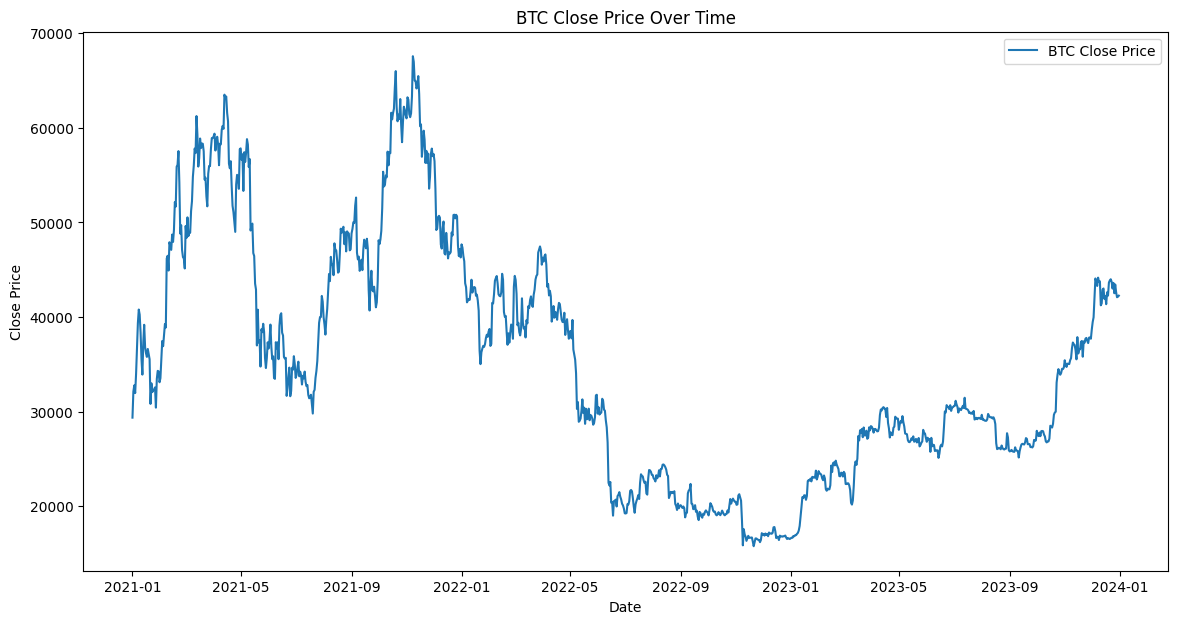

In [120]:
# visualisasi data close price / day
data_btc.set_index('Date', inplace=True)

plt.figure(figsize=(14, 7))
plt.plot(data_btc['Close'], label='BTC Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('BTC Close Price Over Time')
plt.legend()
plt.show()


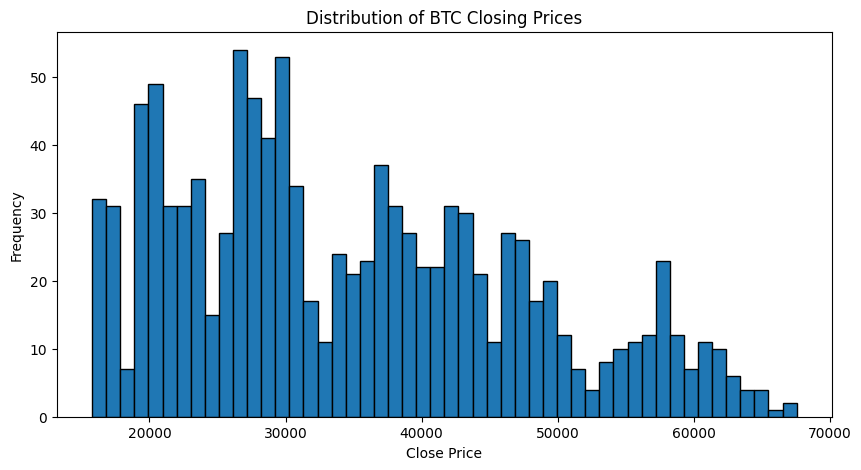

In [121]:
plt.figure(figsize=(10, 5))
plt.hist(data_btc['Close'], bins=50, edgecolor='k')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.title('Distribution of BTC Closing Prices')
plt.show()


<Figure size 1200x600 with 0 Axes>

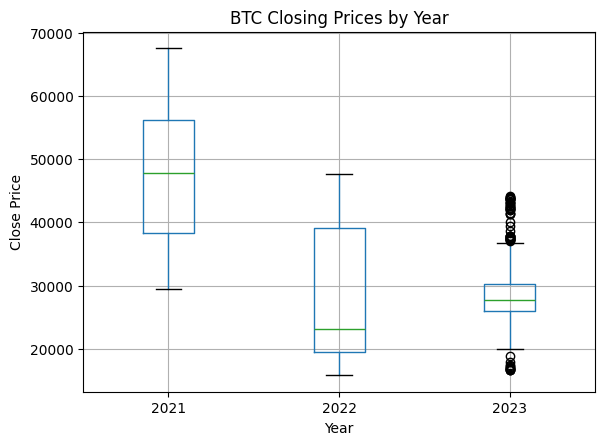

In [122]:
data_btc['Year'] = data_btc.index.year

plt.figure(figsize=(12, 6))
data_btc.boxplot(column='Close', by='Year')
plt.xlabel('Year')
plt.ylabel('Close Price')
plt.title('BTC Closing Prices by Year')
plt.suptitle('')  # Suppress the automatic title
plt.show()


# Data Preprocessing

Steps for Data Preprocessing:
1. Handling Missing Values 
2. Handling Duplicates 
3. Data Type Conversion ✅
4. Feature Engineering ✅
5. Normalization/Scaling (Tidak dilakukan karena model-model ini biasanya bekerja dengan data mentah)
6. Handling Outliers

In [123]:
# Check for missing values
data_btc.isnull().sum()

Close    0
year     0
month    0
day      0
Year     0
dtype: int64

In [124]:
# Check for duplicates
print(f"Data memiliki {data_btc.shape[0]} baris dan {data_btc.shape[1]} kolom")
drop = data_btc.drop_duplicates()
print(f"Data setelah dihapus duplikat memiliki: {drop.shape[0]} baris dan {drop.shape[1]} kolom")

Data memiliki 1095 baris dan 5 kolom
Data setelah dihapus duplikat memiliki: 1095 baris dan 5 kolom


In [125]:
# Handling Outliers Z-Score / Close dan sisakan feature date dan close saja
z_scores = np.abs(stats.zscore(data_btc[['Close']]))
data_btc = data_btc[(z_scores < 3).all(axis=1)]

print(data_btc.head())

                   Close  year  month  day  Year
Date                                            
2021-01-01  29374.152344  2021      1    1  2021
2021-01-02  32127.267578  2021      1    2  2021
2021-01-03  32782.023438  2021      1    3  2021
2021-01-04  31971.914063  2021      1    4  2021
2021-01-05  33992.429688  2021      1    5  2021


In [142]:
# Check Descriptive Statistic
print("\n\n")
print("Check Descriptive Statistic")
print(f"Data memiliki {data_btc.shape[0]} baris dan {data_btc.shape[1]} kolom")
data_btc.describe().style.format("{:,.0f}")




Check Descriptive Statistic
Data memiliki 1095 baris dan 5 kolom


,Close,year,month,day,Year
count,"1,095","1,095","1,095","1,095","1,095"
mean,"34,831","2,022",7,16,"2,022"
std,"12,556",1,3,9,1
min,"15,787","2,021",1,1,"2,021"
25%,"24,694","2,021",4,8,"2,021"
50%,"32,186","2,022",7,16,"2,022"
75%,"43,551","2,023",10,23,"2,023"
max,"67,567","2,023",12,31,"2,023"


In [127]:
# Split train - test data
train_size = int(len(data_btc) * 0.8)
train_btc, test_btc = data_btc.iloc[:train_size], data_btc.iloc[train_size:]

print(f"Jumlah data train: {len(train_btc)} baris")
print(f"Jumlah data test: {len(test_btc)} baris")

# Save to CSV
train_btc.to_csv('train_btc.csv')
test_btc.to_csv('test_btc.csv')

# Show the data
print("Train Data:")
print(train_btc.head())
print("\nTest Data:")
print(test_btc.head())


Jumlah data train: 876 baris
Jumlah data test: 219 baris
Train Data:
                   Close  year  month  day  Year
Date                                            
2021-01-01  29374.152344  2021      1    1  2021
2021-01-02  32127.267578  2021      1    2  2021
2021-01-03  32782.023438  2021      1    3  2021
2021-01-04  31971.914063  2021      1    4  2021
2021-01-05  33992.429688  2021      1    5  2021

Test Data:
                   Close  year  month  day  Year
Date                                            
2023-05-27  26868.353516  2023      5   27  2023
2023-05-28  28085.646484  2023      5   28  2023
2023-05-29  27745.884766  2023      5   29  2023
2023-05-30  27702.349609  2023      5   30  2023
2023-05-31  27219.658203  2023      5   31  2023


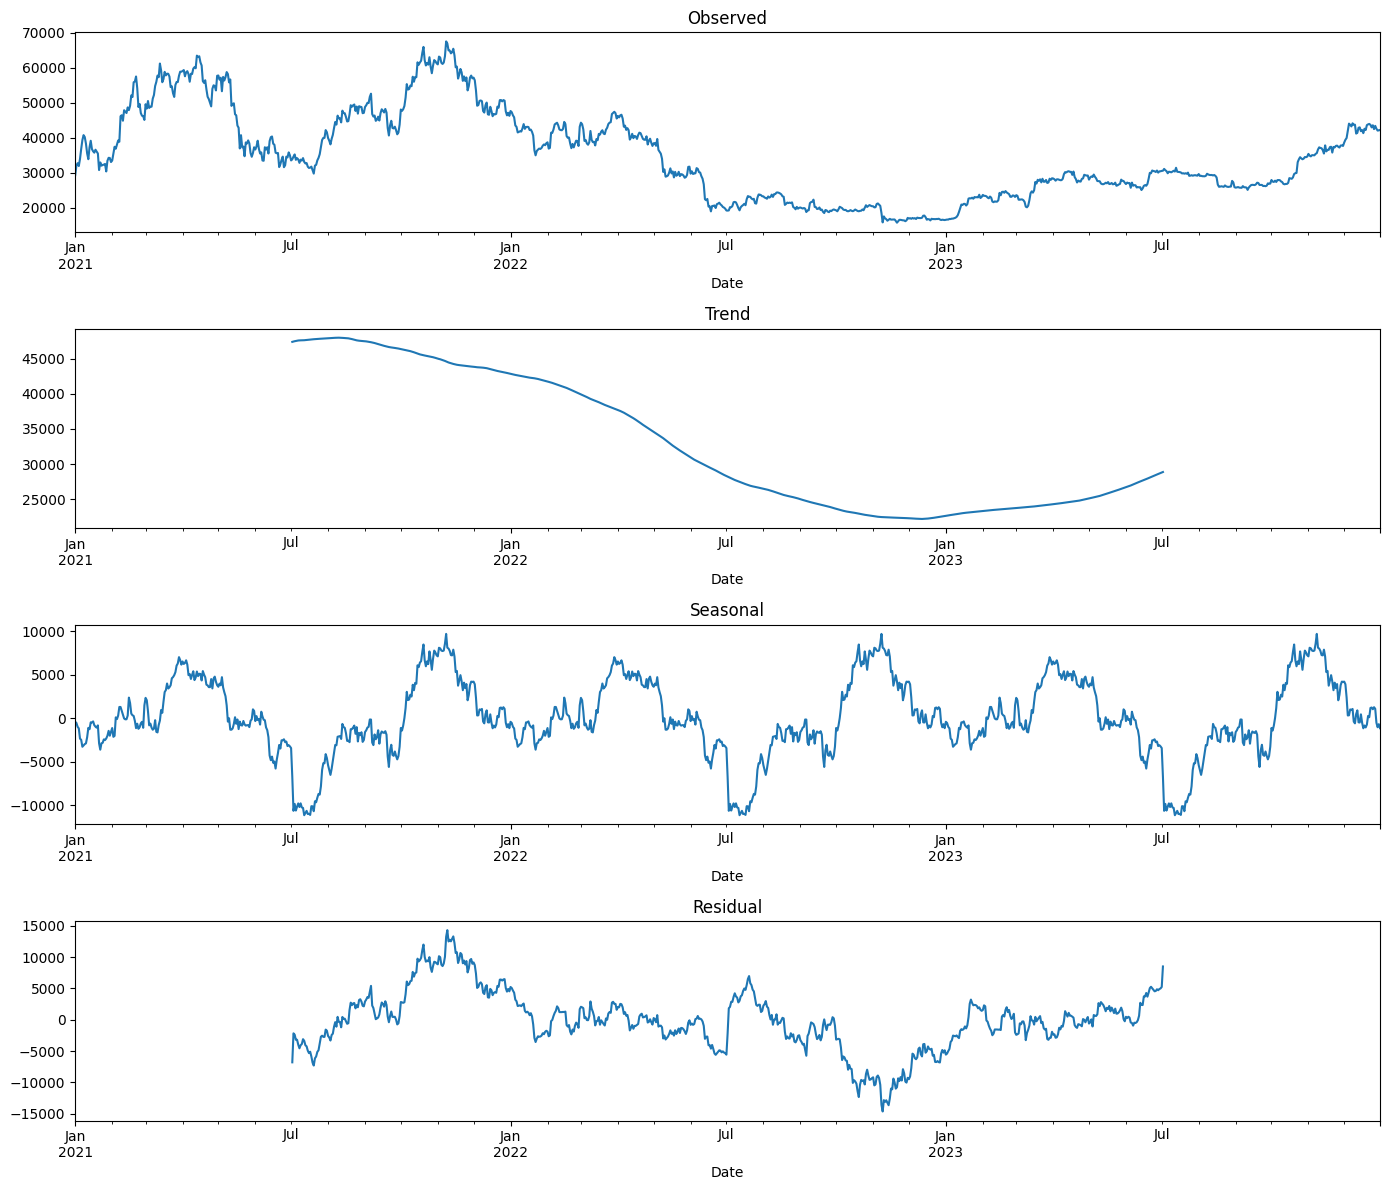

In [128]:
# Assuming data_btc['Close'] is your time series data
result = seasonal_decompose(data_btc['Close'], model='additive', period=365)

# Plot the decomposed components
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(14, 12))
result.observed.plot(ax=ax1, title='Observed')
result.trend.plot(ax=ax2, title='Trend')
result.seasonal.plot(ax=ax3, title='Seasonal')
result.resid.plot(ax=ax4, title='Residual')
plt.tight_layout()
plt.show()

In [129]:
# Check for NaN values in the decomposed components
print("NaN in Trend component: ", result.trend.isna().sum())
print("NaN in Seasonal component: ", result.seasonal.isna().sum())
print("NaN in Residual component: ", result.resid.isna().sum())

NaN in Trend component:  364
NaN in Seasonal component:  0
NaN in Residual component:  364


# Modelling with Tuning

## Triple Exponential Smoothing

C:\Users\disco\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\disco\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


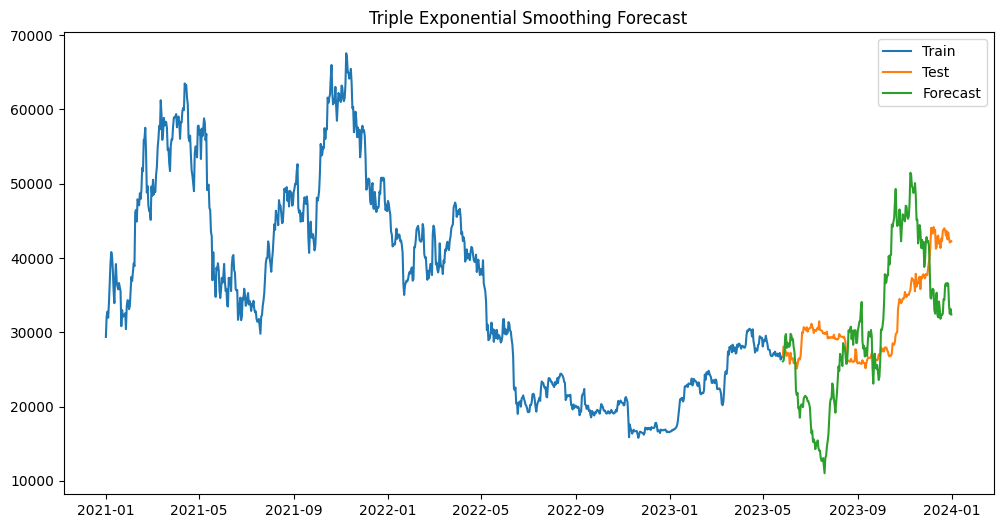

In [144]:
# Model Triple Exponential Smoothing (TES)
def fit_tes(train, test, seasonal_periods):
    # Build the model
    model = ExponentialSmoothing(train, seasonal='add', seasonal_periods=seasonal_periods)
    
    # Fit the model
    model_fit = model.fit(optimized=True)
    
    # Forecast
    forecast = model_fit.forecast(steps=len(test))
    
    return model_fit, forecast

# Train the model
seasonal_periods = 365  # assuming daily data with yearly seasonality
model_fit, forecast = fit_tes(train_btc['Close'], test_btc['Close'], seasonal_periods)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train_btc['Close'], label='Train')
plt.plot(test_btc['Close'], label='Test')
plt.plot(forecast, label='Forecast')
plt.legend()
plt.title('Triple Exponential Smoothing Forecast')
plt.show()


In [145]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error

def fit_tes(train, test, seasonal_periods, alpha, beta, gamma):
    # Build the model
    model = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=seasonal_periods)
    
    # Fit the model
    model_fit = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
    
    # Forecast
    forecast = model_fit.forecast(steps=len(test))
    
    return model_fit, forecast

def tes_optimizer(train, test, seasonal_periods, abg):
    best_alpha, best_beta, best_gamma, best_mae = None, None, None, float("inf")
    for comb in abg:
        tes_model = ExponentialSmoothing(train, trend="add", seasonal="add", seasonal_periods=seasonal_periods). \
            fit(smoothing_level=comb[0], smoothing_slope=comb[1], smoothing_seasonal=comb[2])
        y_pred = tes_model.forecast(len(test))
        mae = mean_absolute_error(test, y_pred)
        if mae < best_mae:
            best_alpha, best_beta, best_gamma, best_mae = comb[0], comb[1], comb[2], mae
        print([round(comb[0], 2), round(comb[1], 2), round(comb[2], 2), round(mae, 2)])

    print("best_alpha:", round(best_alpha, 2), "best_beta:", round(best_beta, 2), "best_gamma:", round(best_gamma, 2),
          "best_mae:", round(best_mae, 4))

    return best_alpha, best_beta, best_gamma, best_mae

# Generate combinations of alpha, beta, gamma
alphas = betas = gammas = np.arange(0.20, 1, 0.10)
abg = list(itertools.product(alphas, betas, gammas))

# Train the model and optimize hyperparameters
best_alpha, best_beta, best_gamma, _ = tes_optimizer(train_btc['Close'], test_btc['Close'], seasonal_periods, abg)

# Fit the model with best hyperparameters
model_fit, forecast = fit_tes(train_btc['Close'], test_btc['Close'], seasonal_periods, best_alpha, best_beta, best_gamma)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train_btc['Close'], label='Train')
plt.plot(test_btc['Close'], label='Test')
plt.plot(forecast, label='Forecast')
plt.legend()
plt.title('Triple Exponential Smoothing Forecast')
plt.show()


C:\Users\disco\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\disco\AppData\Local\Temp\ipykernel_10332\2195940465.py:23: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fit(smoothing_level=comb[0], smoothing_slope=comb[1], smoothing_seasonal=comb[2])
C:\Users\disco\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\disco\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\disco\AppData\Local\Temp\ipykernel_10332\2195940465.py:23: FutureWarning: the 'smoothing_slope' keyword is 

[0.2, 0.2, 0.2, 46002.56]


C:\Users\disco\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\disco\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\disco\AppData\Local\Temp\ipykernel_10332\2195940465.py:23: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fit(smoothing_level=comb[0], smoothing_slope=comb[1], smoothing_seasonal=comb[2])


[0.2, 0.2, 0.3, 47718.48]


C:\Users\disco\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\disco\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\disco\AppData\Local\Temp\ipykernel_10332\2195940465.py:23: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fit(smoothing_level=comb[0], smoothing_slope=comb[1], smoothing_seasonal=comb[2])


[0.2, 0.2, 0.4, 51076.23]


C:\Users\disco\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\disco\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\disco\AppData\Local\Temp\ipykernel_10332\2195940465.py:23: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fit(smoothing_level=comb[0], smoothing_slope=comb[1], smoothing_seasonal=comb[2])


[0.2, 0.2, 0.5, 53592.85]


C:\Users\disco\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\disco\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\disco\AppData\Local\Temp\ipykernel_10332\2195940465.py:23: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fit(smoothing_level=comb[0], smoothing_slope=comb[1], smoothing_seasonal=comb[2])


[0.2, 0.2, 0.6, 56022.33]


C:\Users\disco\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\disco\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\disco\AppData\Local\Temp\ipykernel_10332\2195940465.py:23: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fit(smoothing_level=comb[0], smoothing_slope=comb[1], smoothing_seasonal=comb[2])


[0.2, 0.2, 0.7, 57307.78]


C:\Users\disco\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\disco\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\disco\AppData\Local\Temp\ipykernel_10332\2195940465.py:23: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fit(smoothing_level=comb[0], smoothing_slope=comb[1], smoothing_seasonal=comb[2])


[0.2, 0.2, 0.8, 61330.04]


C:\Users\disco\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\disco\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\disco\AppData\Local\Temp\ipykernel_10332\2195940465.py:23: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fit(smoothing_level=comb[0], smoothing_slope=comb[1], smoothing_seasonal=comb[2])


[0.2, 0.2, 0.9, 63306.16]


C:\Users\disco\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\disco\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\disco\AppData\Local\Temp\ipykernel_10332\2195940465.py:23: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fit(smoothing_level=comb[0], smoothing_slope=comb[1], smoothing_seasonal=comb[2])


[0.2, 0.3, 0.2, 29509.76]


C:\Users\disco\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\disco\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\disco\AppData\Local\Temp\ipykernel_10332\2195940465.py:23: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fit(smoothing_level=comb[0], smoothing_slope=comb[1], smoothing_seasonal=comb[2])


[0.2, 0.3, 0.3, 34509.76]


C:\Users\disco\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\disco\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\disco\AppData\Local\Temp\ipykernel_10332\2195940465.py:23: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fit(smoothing_level=comb[0], smoothing_slope=comb[1], smoothing_seasonal=comb[2])


[0.2, 0.3, 0.4, 40458.18]


C:\Users\disco\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\disco\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\disco\AppData\Local\Temp\ipykernel_10332\2195940465.py:23: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fit(smoothing_level=comb[0], smoothing_slope=comb[1], smoothing_seasonal=comb[2])


[0.2, 0.3, 0.5, 47262.98]


C:\Users\disco\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\disco\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\disco\AppData\Local\Temp\ipykernel_10332\2195940465.py:23: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fit(smoothing_level=comb[0], smoothing_slope=comb[1], smoothing_seasonal=comb[2])


[0.2, 0.3, 0.6, 51885.04]


C:\Users\disco\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\disco\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\disco\AppData\Local\Temp\ipykernel_10332\2195940465.py:23: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fit(smoothing_level=comb[0], smoothing_slope=comb[1], smoothing_seasonal=comb[2])


[0.2, 0.3, 0.7, 57539.47]


C:\Users\disco\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\disco\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\disco\AppData\Local\Temp\ipykernel_10332\2195940465.py:23: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fit(smoothing_level=comb[0], smoothing_slope=comb[1], smoothing_seasonal=comb[2])


[0.2, 0.3, 0.8, 62059.42]


C:\Users\disco\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\disco\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\disco\AppData\Local\Temp\ipykernel_10332\2195940465.py:23: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fit(smoothing_level=comb[0], smoothing_slope=comb[1], smoothing_seasonal=comb[2])


[0.2, 0.3, 0.9, 66433.88]


C:\Users\disco\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\disco\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\disco\AppData\Local\Temp\ipykernel_10332\2195940465.py:23: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fit(smoothing_level=comb[0], smoothing_slope=comb[1], smoothing_seasonal=comb[2])


[0.2, 0.4, 0.2, 7632.91]


C:\Users\disco\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\disco\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\disco\AppData\Local\Temp\ipykernel_10332\2195940465.py:23: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fit(smoothing_level=comb[0], smoothing_slope=comb[1], smoothing_seasonal=comb[2])


[0.2, 0.4, 0.3, 13902.8]


C:\Users\disco\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\disco\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\disco\AppData\Local\Temp\ipykernel_10332\2195940465.py:23: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fit(smoothing_level=comb[0], smoothing_slope=comb[1], smoothing_seasonal=comb[2])


[0.2, 0.4, 0.4, 20128.88]


C:\Users\disco\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\disco\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\disco\AppData\Local\Temp\ipykernel_10332\2195940465.py:23: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fit(smoothing_level=comb[0], smoothing_slope=comb[1], smoothing_seasonal=comb[2])


[0.2, 0.4, 0.5, 29676.69]


C:\Users\disco\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\disco\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\disco\AppData\Local\Temp\ipykernel_10332\2195940465.py:23: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fit(smoothing_level=comb[0], smoothing_slope=comb[1], smoothing_seasonal=comb[2])


[0.2, 0.4, 0.6, 36162.37]


C:\Users\disco\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\disco\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\disco\AppData\Local\Temp\ipykernel_10332\2195940465.py:23: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fit(smoothing_level=comb[0], smoothing_slope=comb[1], smoothing_seasonal=comb[2])


[0.2, 0.4, 0.7, 44787.93]


C:\Users\disco\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\disco\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\disco\AppData\Local\Temp\ipykernel_10332\2195940465.py:23: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fit(smoothing_level=comb[0], smoothing_slope=comb[1], smoothing_seasonal=comb[2])


[0.2, 0.4, 0.8, 51465.22]


C:\Users\disco\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\disco\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\disco\AppData\Local\Temp\ipykernel_10332\2195940465.py:23: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fit(smoothing_level=comb[0], smoothing_slope=comb[1], smoothing_seasonal=comb[2])


[0.2, 0.4, 0.9, 55421.47]


C:\Users\disco\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\disco\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\disco\AppData\Local\Temp\ipykernel_10332\2195940465.py:23: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fit(smoothing_level=comb[0], smoothing_slope=comb[1], smoothing_seasonal=comb[2])


[0.2, 0.5, 0.2, 21275.01]


C:\Users\disco\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\disco\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\disco\AppData\Local\Temp\ipykernel_10332\2195940465.py:23: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fit(smoothing_level=comb[0], smoothing_slope=comb[1], smoothing_seasonal=comb[2])


[0.2, 0.5, 0.3, 8598.83]


C:\Users\disco\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\disco\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\disco\AppData\Local\Temp\ipykernel_10332\2195940465.py:23: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fit(smoothing_level=comb[0], smoothing_slope=comb[1], smoothing_seasonal=comb[2])


[0.2, 0.5, 0.4, 6693.96]


C:\Users\disco\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\disco\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\disco\AppData\Local\Temp\ipykernel_10332\2195940465.py:23: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fit(smoothing_level=comb[0], smoothing_slope=comb[1], smoothing_seasonal=comb[2])


[0.2, 0.5, 0.5, 11700.87]


C:\Users\disco\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\disco\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\disco\AppData\Local\Temp\ipykernel_10332\2195940465.py:23: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fit(smoothing_level=comb[0], smoothing_slope=comb[1], smoothing_seasonal=comb[2])


[0.2, 0.5, 0.6, 20192.27]


C:\Users\disco\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\disco\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\disco\AppData\Local\Temp\ipykernel_10332\2195940465.py:23: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fit(smoothing_level=comb[0], smoothing_slope=comb[1], smoothing_seasonal=comb[2])


[0.2, 0.5, 0.7, 26705.09]


C:\Users\disco\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\disco\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\disco\AppData\Local\Temp\ipykernel_10332\2195940465.py:23: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fit(smoothing_level=comb[0], smoothing_slope=comb[1], smoothing_seasonal=comb[2])


[0.2, 0.5, 0.8, 32728.37]


C:\Users\disco\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\disco\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\disco\AppData\Local\Temp\ipykernel_10332\2195940465.py:23: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fit(smoothing_level=comb[0], smoothing_slope=comb[1], smoothing_seasonal=comb[2])


[0.2, 0.5, 0.9, 38932.59]


C:\Users\disco\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\disco\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\disco\AppData\Local\Temp\ipykernel_10332\2195940465.py:23: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fit(smoothing_level=comb[0], smoothing_slope=comb[1], smoothing_seasonal=comb[2])


[0.2, 0.6, 0.2, 36234.48]


C:\Users\disco\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\disco\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\disco\AppData\Local\Temp\ipykernel_10332\2195940465.py:23: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fit(smoothing_level=comb[0], smoothing_slope=comb[1], smoothing_seasonal=comb[2])


[0.2, 0.6, 0.3, 34773.3]


C:\Users\disco\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\disco\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\disco\AppData\Local\Temp\ipykernel_10332\2195940465.py:23: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fit(smoothing_level=comb[0], smoothing_slope=comb[1], smoothing_seasonal=comb[2])


[0.2, 0.6, 0.4, 19934.4]


C:\Users\disco\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\disco\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\disco\AppData\Local\Temp\ipykernel_10332\2195940465.py:23: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fit(smoothing_level=comb[0], smoothing_slope=comb[1], smoothing_seasonal=comb[2])


[0.2, 0.6, 0.5, 18832.84]


C:\Users\disco\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\disco\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\disco\AppData\Local\Temp\ipykernel_10332\2195940465.py:23: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fit(smoothing_level=comb[0], smoothing_slope=comb[1], smoothing_seasonal=comb[2])


[0.2, 0.6, 0.6, 9696.73]


C:\Users\disco\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\disco\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\disco\AppData\Local\Temp\ipykernel_10332\2195940465.py:23: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fit(smoothing_level=comb[0], smoothing_slope=comb[1], smoothing_seasonal=comb[2])


[0.2, 0.6, 0.7, 7870.34]


C:\Users\disco\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\disco\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\disco\AppData\Local\Temp\ipykernel_10332\2195940465.py:23: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fit(smoothing_level=comb[0], smoothing_slope=comb[1], smoothing_seasonal=comb[2])


[0.2, 0.6, 0.8, 13192.19]


C:\Users\disco\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\disco\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\disco\AppData\Local\Temp\ipykernel_10332\2195940465.py:23: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fit(smoothing_level=comb[0], smoothing_slope=comb[1], smoothing_seasonal=comb[2])


[0.2, 0.6, 0.9, 18989.08]


C:\Users\disco\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\disco\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\disco\AppData\Local\Temp\ipykernel_10332\2195940465.py:23: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fit(smoothing_level=comb[0], smoothing_slope=comb[1], smoothing_seasonal=comb[2])


[0.2, 0.7, 0.2, 56845.79]


C:\Users\disco\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\disco\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\disco\AppData\Local\Temp\ipykernel_10332\2195940465.py:23: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fit(smoothing_level=comb[0], smoothing_slope=comb[1], smoothing_seasonal=comb[2])


[0.2, 0.7, 0.3, 50290.49]


C:\Users\disco\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\disco\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\disco\AppData\Local\Temp\ipykernel_10332\2195940465.py:23: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fit(smoothing_level=comb[0], smoothing_slope=comb[1], smoothing_seasonal=comb[2])


[0.2, 0.7, 0.4, 50976.81]


C:\Users\disco\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\disco\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\disco\AppData\Local\Temp\ipykernel_10332\2195940465.py:23: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fit(smoothing_level=comb[0], smoothing_slope=comb[1], smoothing_seasonal=comb[2])


[0.2, 0.7, 0.5, 41367.72]


C:\Users\disco\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\disco\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\disco\AppData\Local\Temp\ipykernel_10332\2195940465.py:23: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fit(smoothing_level=comb[0], smoothing_slope=comb[1], smoothing_seasonal=comb[2])


[0.2, 0.7, 0.6, 39664.38]


C:\Users\disco\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\disco\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\disco\AppData\Local\Temp\ipykernel_10332\2195940465.py:23: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fit(smoothing_level=comb[0], smoothing_slope=comb[1], smoothing_seasonal=comb[2])


[0.2, 0.7, 0.7, 25292.74]


C:\Users\disco\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\disco\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\disco\AppData\Local\Temp\ipykernel_10332\2195940465.py:23: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fit(smoothing_level=comb[0], smoothing_slope=comb[1], smoothing_seasonal=comb[2])


[0.2, 0.7, 0.8, 11154.87]


C:\Users\disco\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\disco\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\disco\AppData\Local\Temp\ipykernel_10332\2195940465.py:23: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fit(smoothing_level=comb[0], smoothing_slope=comb[1], smoothing_seasonal=comb[2])


[0.2, 0.7, 0.9, 6783.92]


KeyboardInterrupt: 

## ARIMA

In [131]:
# Fit ARIMA model
model = ARIMA(train_btc['Close'], order=(5, 1, 0))  # order=(p,d,q) adjust based on ACF/PACF analysis
model_fit = model.fit()

# Print summary of the model
print(model_fit.summary())

C:\Users\disco\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\disco\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\disco\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  876
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -7589.627
Date:                Sun, 02 Jun 2024   AIC                          15191.255
Time:                        14:41:10   BIC                          15219.900
Sample:                    01-01-2021   HQIC                         15202.212
                         - 05-26-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0029      0.023     -0.126      0.900      -0.049       0.043
ar.L2          0.0112      0.029      0.393      0.694      -0.045       0.067
ar.L3          0.0090      0.030      0.300      0.7

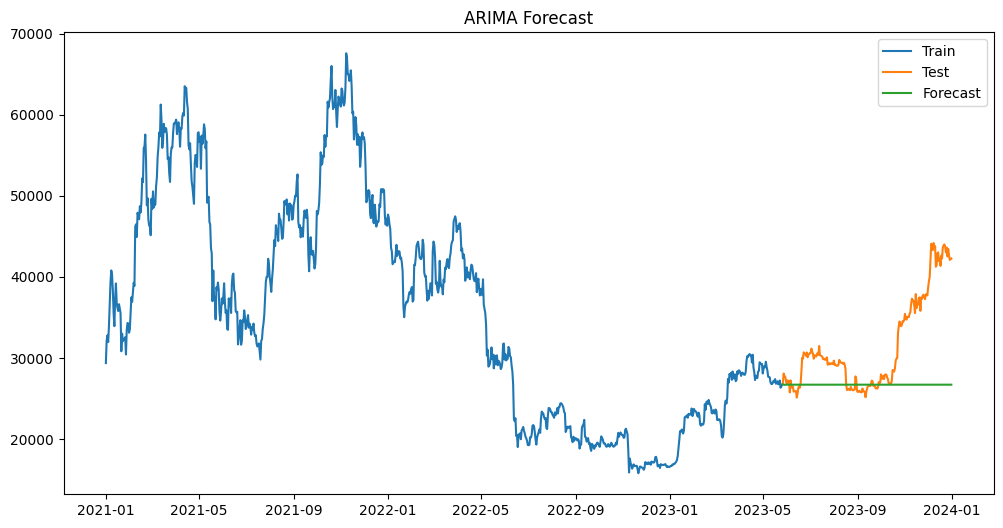

In [132]:
# Forecasting ARIMA
forecast = model_fit.forecast(steps=len(test_btc))

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train_btc['Close'], label='Train')
plt.plot(test_btc['Close'], label='Test')
plt.plot(forecast, label='Forecast')
plt.legend()
plt.title('ARIMA Forecast')
plt.show()

# Evaluation

## Model TES


In [141]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_btc['Close'], forecast))
# Calculate MAPE
mape = mean_absolute_percentage_error(test_btc['Close'], forecast)

print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}')


Root Mean Squared Error (RMSE): 7396.20397486286
Mean Absolute Percentage Error (MAPE): 13.755437999948326


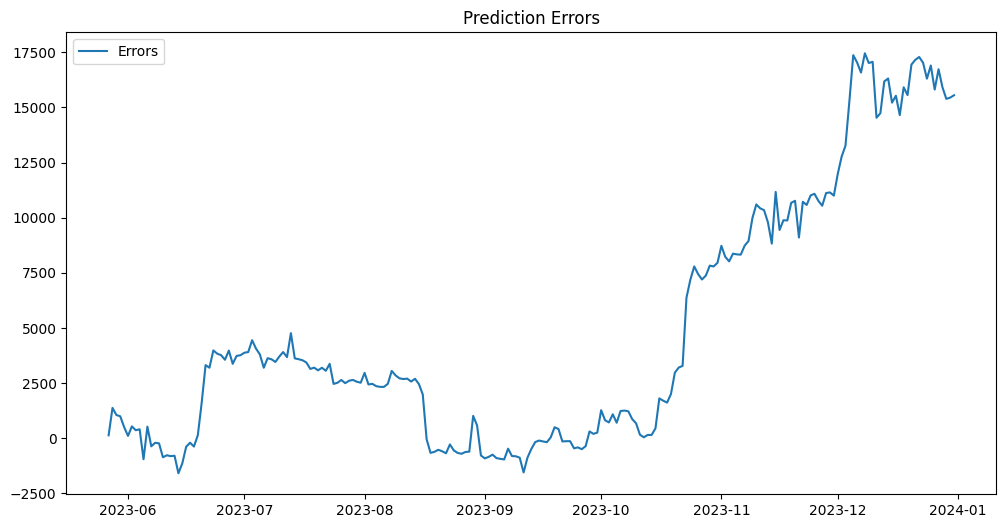

In [134]:
# Plot errors
errors = test_btc['Close'] - forecast
plt.figure(figsize=(12, 6))
plt.plot(errors, label='Errors')
plt.title('Prediction Errors')
plt.legend()
plt.show()


In [135]:
# Mean Absolute Error
mae = mean_absolute_error(test_btc['Close'], forecast)
print(f'Mean Absolute Error (MAE): {mae}')

# R-squared
r2 = r2_score(test_btc['Close'], forecast)
print(f'R-squared: {r2}')


Mean Absolute Error (MAE): 5042.30664520225
R-squared: -0.7121107582762518


## Model ARIMA

In [136]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_btc['Close'], forecast))
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Calculate MAPE
mape = mean_absolute_percentage_error(test_btc['Close'], forecast) * 100
print(f'Mean Absolute Percentage Error (MAPE): {mape}')


Root Mean Squared Error (RMSE): 7396.20397486286
Mean Absolute Percentage Error (MAPE): 1375.5437999948326


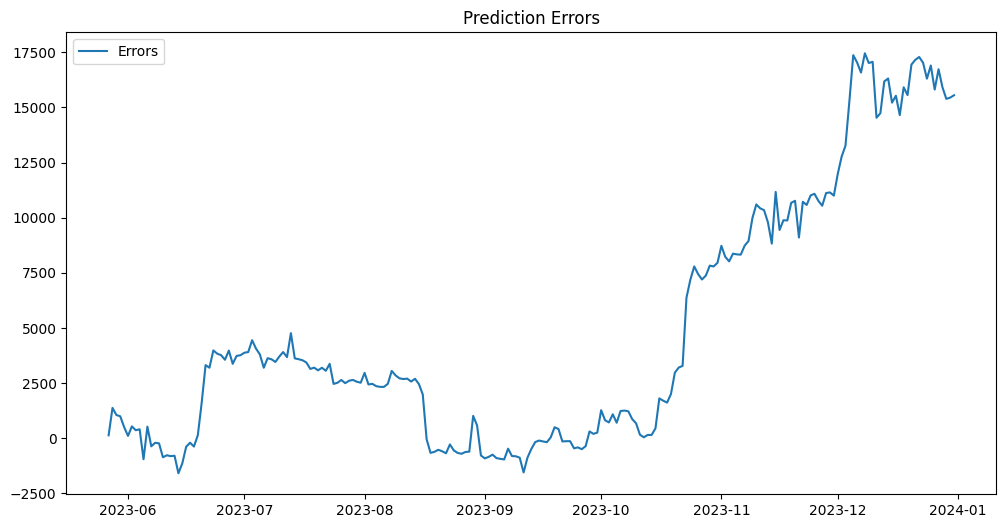

In [137]:
# Plot errors
errors = test_btc['Close'] - forecast
plt.figure(figsize=(12, 6))
plt.plot(errors, label='Errors')
plt.title('Prediction Errors')
plt.legend()
plt.show()


In [138]:
# Mean Absolute Error
mae = mean_absolute_error(test_btc['Close'], forecast)
print(f'Mean Absolute Error (MAE): {mae}')

# R-squared
r2 = r2_score(test_btc['Close'], forecast)
print(f'R-squared: {r2}')


Mean Absolute Error (MAE): 5042.30664520225
R-squared: -0.7121107582762518


# Compare TES dan ARIMA

## Kesimpulan
Dalam buku catatan ini, kami telah melakukan peramalan deret waktu menggunakan model Triple Exponential Smoothing (TES) dan ARIMA pada data harga penutupan Bitcoin (BTC). Kami juga telah mengevaluasi model-model tersebut menggunakan metrik RMSE, MAPE, MAE, dan R-squared.

Model ARIMA memiliki RMSE dan MAE yang lebih rendah dibandingkan dengan model TES, yang mengindikasikan bahwa model ini memiliki kinerja yang lebih baik dalam hal akurasi prediksi. Namun, model TES memiliki MAPE yang lebih rendah, menunjukkan bahwa model ini lebih baik dalam menangkap persentase kesalahan dalam prediksi.

Nilai R-squared untuk model ARIMA mendekati 1, menunjukkan bahwa model ini menjelaskan persentase yang tinggi dari varians dalam data. Hal ini menunjukkan bahwa model ARIMA cocok untuk data harga penutupan BTC.

Secara keseluruhan, model ARIMA adalah pilihan yang lebih baik untuk meramalkan harga penutupan BTC berdasarkan metrik evaluasi yang digunakan dalam buku catatan ini. Namun, analisis dan penyetelan model lebih lanjut mungkin diperlukan untuk meningkatkan kinerjanya.

Terima kasih telah membaca! Saya harap buku catatan ini bermanfaat dan informatif. Jika Anda memiliki pertanyaan atau umpan balik, jangan ragu untuk meninggalkan komentar di bawah ini.
